In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
ds.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
X = ds.iloc[:,:-1].values
Y = ds.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
LE = LabelEncoder()

In [8]:
X[:,0] = LE.fit_transform(X[:,0])

In [9]:
X[:5,:]

array([[0, 80.0, 0, 1, 'never', 25.19, 6.6, 140],
       [0, 54.0, 0, 0, 'No Info', 27.32, 6.6, 80],
       [1, 28.0, 0, 0, 'never', 27.32, 5.7, 158],
       [0, 36.0, 0, 0, 'current', 23.45, 5.0, 155],
       [1, 76.0, 1, 1, 'current', 20.14, 4.8, 155]], dtype=object)

In [10]:
X.shape

(100000, 8)

In [11]:
#X = X[X[:,4]!='No Info',:]

In [12]:
#X[:5,:]

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [14]:
CT = ColumnTransformer(transformers =[('encoder',OneHotEncoder(),[4])],remainder ='passthrough')

In [15]:
X = CT.fit_transform(X)

In [16]:
X[:5,:]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 80.0, 0, 1, 25.19, 6.6, 140],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 54.0, 0, 0, 27.32, 6.6, 80],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 28.0, 0, 0, 27.32, 5.7, 158],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0, 36.0, 0, 0, 23.45, 5.0, 155],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1, 76.0, 1, 1, 20.14, 4.8, 155]],
      dtype=object)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
classifierLR = LogisticRegression(max_iter=10000)

In [21]:
Ytrain

array([0, 1, 0, ..., 0, 0, 0], shape=(80000,))

In [22]:
classifierLR.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=10000)

In [23]:
Ypred = classifierLR.predict(Xtest)

In [24]:
Ypred

array([0, 0, 0, ..., 0, 0, 0], shape=(20000,))

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score ,classification_report

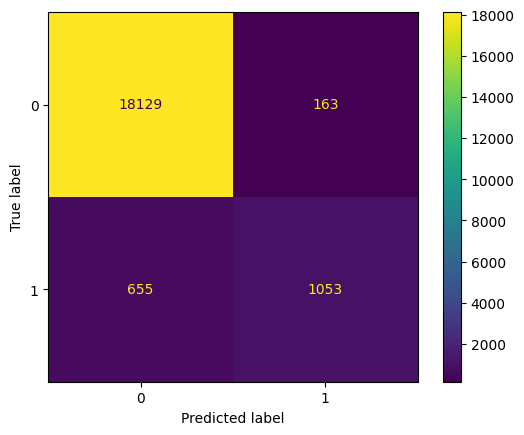

In [26]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred)

In [27]:
print(f'accuracy score: {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

accuracy score: 0.9591
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.87      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
classifierDTC = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [30]:
classifierDTC.fit(Xtrain,Ytrain)
Ypred = classifierDTC.predict(Xtest)

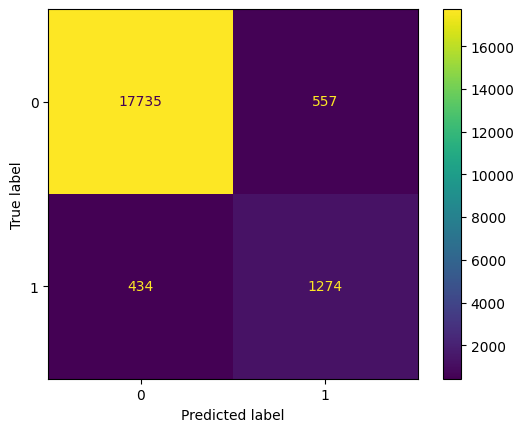

In [31]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred)

In [32]:
print(f'accuracy score: {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

accuracy score: 0.95045
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.70      0.75      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
classifierRFC = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state = 42)

In [35]:
classifierRFC.fit(Xtrain,Ytrain)
Ypred = classifierRFC.predict(Xtest)

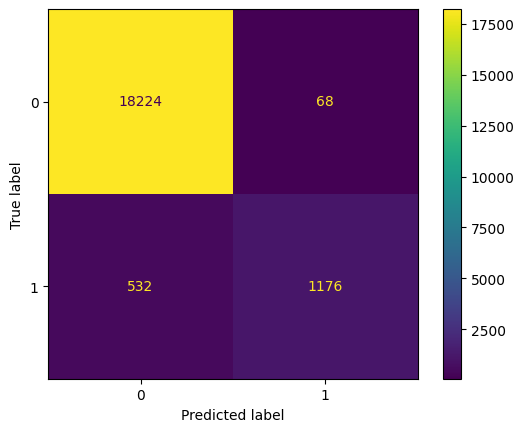

In [36]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred)

In [37]:
print(f'accuracy score: {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

accuracy score: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

